# Assignment 1 Data Wrangling 


### Question 1

In [141]:
import pandas as pd
import seaborn as sn
import numpy 

In [2]:
file=pd.read_csv("employees.csv")

In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [16]:
print(file.count()[:])

First Name            933
Gender                855
Start Date           1000
Last Login Time      1000
Salary               1000
Bonus %              1000
Senior Management     933
Team                  957
dtype: int64


In [51]:
numeric=['object']
tmp=file.select_dtypes(include=numeric)

In [53]:
tmp=tmp.dropna()

In [54]:
tmp=file.select_dtypes(include=numpy.number)

In [56]:
tmp

,Salary,Bonus %
0,97308,6.945
1,61933,4.170
2,130590,11.858
3,138705,9.340
4,101004,1.389
...,...,...
995,132483,16.655
996,42392,19.675
997,96914,1.421
998,60500,11.985


In [101]:
df2=pd.DataFrame(round(tmp.describe( ),2))
df2=df2.drop(['25%','50%','75%'])
df2=df2.transpose()
df2
#df2[['count','mean','std','min']]
#df2['count','mean','std','min']
#df1.insert(column=['count','mean','std','min'],values=df2)


,count,mean,std,min,max
Salary,1000.0,90662.18,32923.69,35013.00,149908.00
Bonus %,1000.0,10.21,5.53,1.01,19.94


In [115]:
df1=pd.DataFrame(columns=['count','mean','std','min','max'])
#temp_f=lambda x: x['temp_c'] * 9 / 5 + 32,
...          ## temp_k=lambda x: (x['temp_f'] +  459.67) * 5 / 9
df1.assign(count=df2['count'],mean=df2['mean'],std=df2['std'],min=df2['min'],max=df2['max'])

,count,mean,std,min,max
Salary,1000.0,90662.18,32923.69,35013.00,149908.00
Bonus %,1000.0,10.21,5.53,1.01,19.94


### Question 2

In [136]:
file2=pd.read_excel("stores.xlsx")
file2.insert(14,'shipment_days','Placeholder')
file2=file2.assign(shipment_days=lambda x:x['Ship Date']-x['Order Date'])
file2
#file2['Ship Date']-file2['Order Date']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Country/Region,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,shipment_days
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,United States,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,United States,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,United States,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,United States,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,United States,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2018-110422,2018-01-21,2018-01-23,Second Class,United States,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2 days
9990,9991,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,United States,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,5 days
9991,9992,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,United States,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,5 days
9992,9993,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,United States,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5 days


In [138]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Row ID          9994 non-null   int64          
 1   Order ID        9994 non-null   object         
 2   Order Date      9994 non-null   datetime64[ns] 
 3   Ship Date       9994 non-null   datetime64[ns] 
 4   Ship Mode       9994 non-null   object         
 5   Country/Region  9994 non-null   object         
 6   Region          9994 non-null   object         
 7   Category        9994 non-null   object         
 8   Sub-Category    9994 non-null   object         
 9   Product Name    9994 non-null   object         
 10  Sales           9994 non-null   float64        
 11  Quantity        9994 non-null   int64          
 12  Discount        9994 non-null   float64        
 13  Profit          9994 non-null   float64        
 14  shipment_days   9994 non-null   timedelt

In [142]:
tmp=file2.select_dtypes(include=numpy.number)

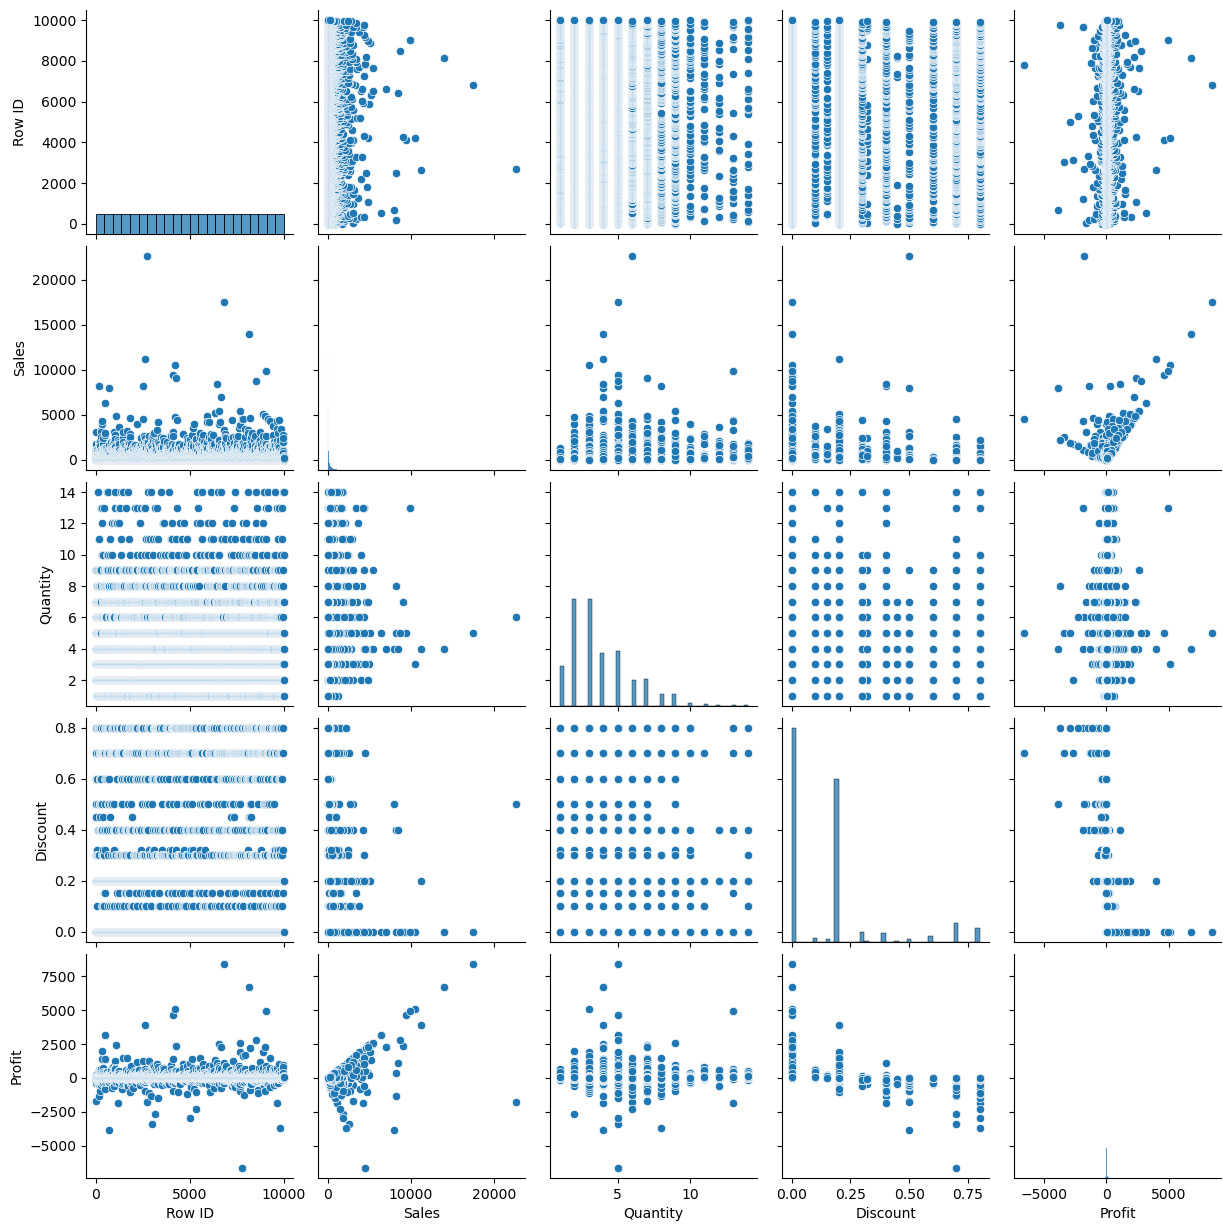

In [152]:
sn.pairplot(tmp)

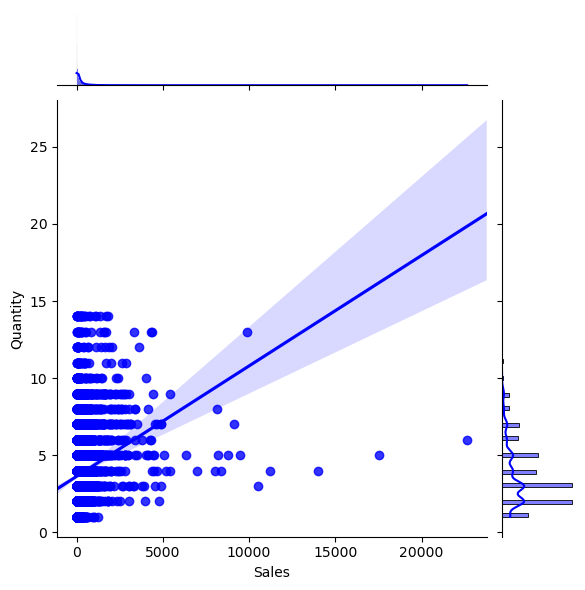

In [157]:
sn.jointplot(x="Sales",y="Quantity",data=tmp,kind="reg",truncate=False,color='b')